# Project Title - QS Top Universities Ranking

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

## Downloading the Dataset


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/prasertk/qs-world-university-rankings-2021' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./qs-world-university-rankings-2021" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './qs-world-university-rankings-2021'

In [5]:
import os
os.listdir(data_dir)

['QS World University Rankings 2017.csv',
 'QS World University Rankings 2022.csv',
 'QS World University Rankings combined.csv',
 'QS World University Rankings 2019.csv',
 'QS World University Rankings 2020.csv',
 'QS World University Rankings 2021.csv',
 'QS World University Rankings 2018.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "World University Ranking"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "carllam23/world-university-ranking" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/carllam23/world-university-ranking


'https://jovian.ai/carllam23/world-university-ranking'

## Data Preparation and Cleaning



In [10]:
import pandas as pd

In [11]:
df_raw_uni = pd.read_csv('./qs-world-university-rankings-2021/QS World University Rankings 2021.csv')

In [12]:
df_raw_uni

,year,rank_display,university,score,link,country,city,region,logo
0,2021,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2021,2,Stanford University,98.4,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
2,2021,3,Harvard University,97.9,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
3,2021,4,California Institute of Technology (Caltech),97.0,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...
4,2021,5,University of Oxford,96.7,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...
...,...,...,...,...,...,...,...,...,...
1180,2021,NaN,Weizmann Institute of Science,NaN,https://www.topuniversities.com/universities/w...,Israel,Rehovot,Asia,https://www.topuniversities.com/sites/default/...
1181,2021,1001+,Universitatea de Vest din Timisoara / West Un...,NaN,https://www.topuniversities.com/universities/u...,Romania,Timișoara,Europe,https://www.topuniversities.com/sites/default/...
1182,2021,NaN,WHU - Otto Beisheim School of Management,NaN,https://www.topuniversities.com/universities/w...,Germany,Vallendar,Europe,https://www.topuniversities.com/sites/default/...
1183,2021,1001+,Yarmouk University,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...


In [13]:
df_raw_uni.columns

Index(['year', 'rank_display', 'university', 'score', 'link', 'country',
       'city', 'region', 'logo'],
      dtype='object')

In [14]:
selected_columns = ['year', 'rank_display', 'university', 'score', 'country','city', 'region']

In [15]:
df_uni = df_raw_uni[selected_columns].copy()

In [16]:
df_uni

,year,rank_display,university,score,country,city,region
0,2021,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America
1,2021,2,Stanford University,98.4,United States,Stanford,North America
2,2021,3,Harvard University,97.9,United States,Cambridge,North America
3,2021,4,California Institute of Technology (Caltech),97.0,United States,Pasadena,North America
4,2021,5,University of Oxford,96.7,United Kingdom,Oxford,Europe
...,...,...,...,...,...,...,...
1180,2021,NaN,Weizmann Institute of Science,NaN,Israel,Rehovot,Asia
1181,2021,1001+,Universitatea de Vest din Timisoara / West Un...,NaN,Romania,Timișoara,Europe
1182,2021,NaN,WHU - Otto Beisheim School of Management,NaN,Germany,Vallendar,Europe
1183,2021,1001+,Yarmouk University,NaN,Jordan,Irbid,Asia


In [17]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1185 non-null   int64  
 1   rank_display  1158 non-null   object 
 2   university    1185 non-null   object 
 3   score         501 non-null    float64
 4   country       1185 non-null   object 
 5   city          1145 non-null   object 
 6   region        1185 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 64.9+ KB


In [18]:
df_uni.isna().sum()

year              0
rank_display     27
university        0
score           684
country           0
city             40
region            0
dtype: int64

In [19]:
df_uni[df_uni['city'].isna()]

,year,rank_display,university,score,country,city,region
51,2021,52,Université PSL,73.3,France,NaN,Europe
82,2021,83,Sorbonne University,63.3,France,NaN,Europe
146,2021,147,Aarhus University,51.0,Denmark,NaN,Europe
208,2021,209,Queen's University Belfast,41.5,United Kingdom,NaN,Europe
235,2021,236,Kyung Hee University,38.8,South Korea,NaN,Asia
305,2021,305,Université Paris-Saclay,34.0,France,NaN,Europe
324,2021,323,Southern University of Science and Technology,32.1,China (Mainland),NaN,Asia
366,2021,367,University of Macau,29.9,Macau SAR,NaN,Asia
367,2021,368,Brunel University London,29.7,United Kingdom,NaN,Europe
383,2021,383,Oxford Brookes University,28.7,United Kingdom,NaN,Europe


In [20]:
df_uni.set_index('rank_display')

,year,university,score,country,city,region
rank_display,,,,,,
1,2021,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America
2,2021,Stanford University,98.4,United States,Stanford,North America
3,2021,Harvard University,97.9,United States,Cambridge,North America
4,2021,California Institute of Technology (Caltech),97.0,United States,Pasadena,North America
5,2021,University of Oxford,96.7,United Kingdom,Oxford,Europe
...,...,...,...,...,...,...
NaN,2021,Weizmann Institute of Science,NaN,Israel,Rehovot,Asia
1001+,2021,Universitatea de Vest din Timisoara / West Un...,NaN,Romania,Timișoara,Europe
NaN,2021,WHU - Otto Beisheim School of Management,NaN,Germany,Vallendar,Europe


In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "carllam23/world-university-ranking" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/carllam23/world-university-ranking


'https://jovian.ai/carllam23/world-university-ranking'

## Exploratory Analysis and Visualization



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country with most top universities

In [24]:
df_uni.country.nunique()

93

In [25]:
df_country = df_uni.country.value_counts().head(10)
df_country

United States       160
United Kingdom       90
China (Mainland)     51
Germany              47
Japan                45
France               42
Italy                40
Australia            36
Russia               32
South Korea          30
Name: country, dtype: int64

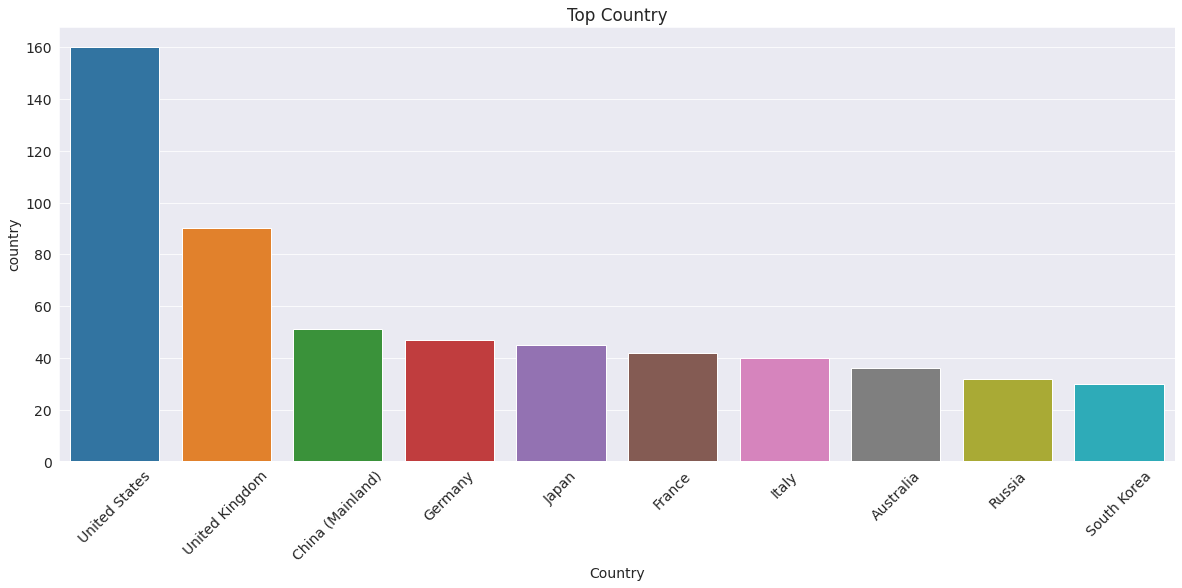

In [26]:
plt.figure(figsize=(20,8))
plt.xlabel("Country")
plt.ylabel("Count of Universities")
plt.title('Top Country')
plt.xticks(rotation=45)
sns.barplot(x=df_country.index,y= df_country);

# Region with most top universities

In [27]:
df_uni.region.nunique()

6

In [28]:
df_region = df_uni.region.value_counts()
df_region

Europe           454
Asia             347
North America    186
Latin America    132
Oceania           44
Africa            22
Name: region, dtype: int64

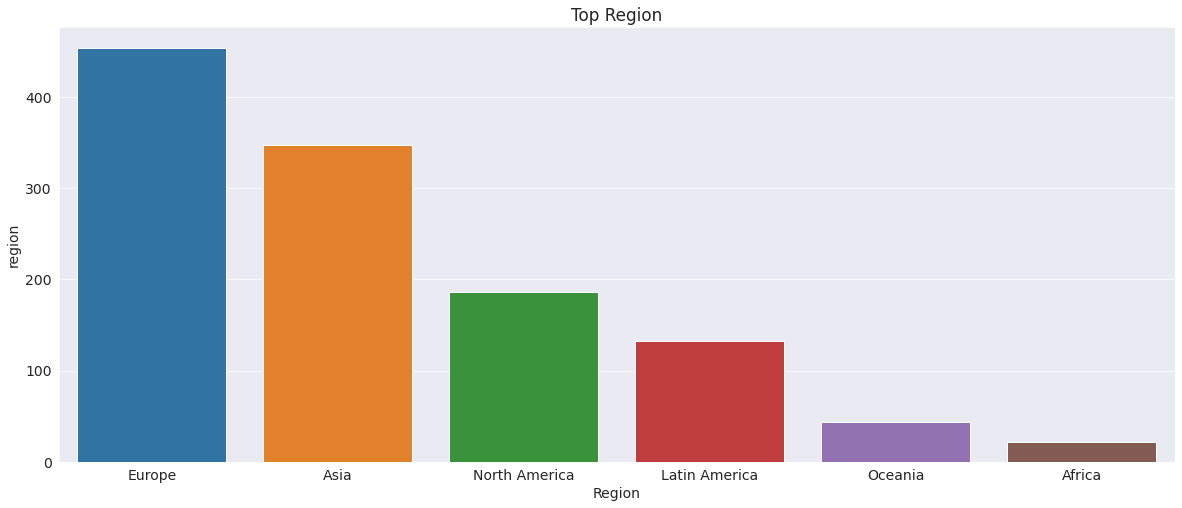

In [29]:
plt.figure(figsize=(20,8))
plt.xlabel("Region")
plt.ylabel("Count of Universities")
plt.title('Top Region')
sns.barplot(x=df_region.index,y= df_region);

# City with most top universities

In [30]:
df_uni.city.nunique()

765

In [31]:
df_city = df_uni.city.value_counts().head(10)
df_city

London          19
Seoul           14
Beijing         11
Tokyo           11
Moscow          10
Buenos Aires     9
Paris            8
Santiago         8
Bogotá           8
Shanghai         7
Name: city, dtype: int64

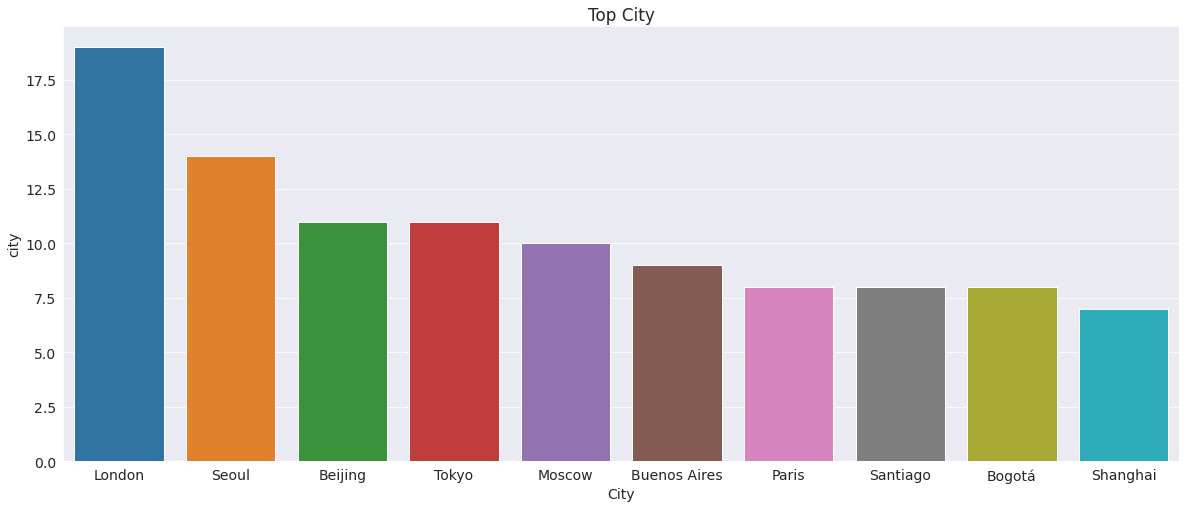

In [32]:
plt.figure(figsize=(20,8))
plt.xlabel("City")
plt.ylabel("Count of Universities")
plt.title('Top City')
sns.barplot(x=df_city.index,y= df_city);

# Relationship between ranking and score

Text(0, 0.5, 'Score')

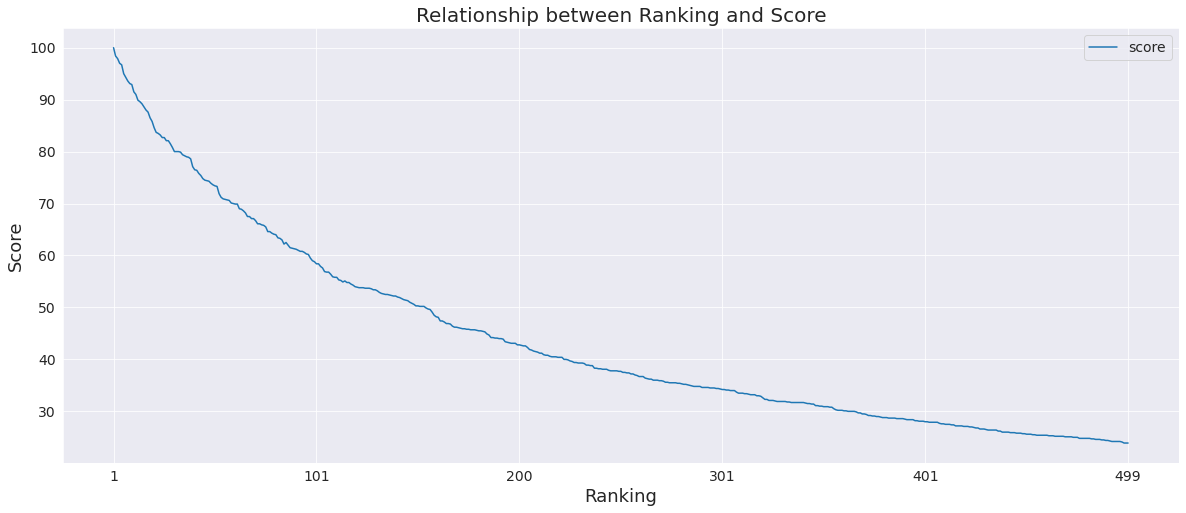

In [33]:
ax = df_uni.plot.line(x='rank_display',y='score',figsize=(20,8))
ax.set_title('Relationship between Ranking and Score',fontsize = 20)
ax.set_xlabel('Ranking', fontsize = 18)
ax.set_ylabel('Score', fontsize = 18)

# Top 10 Universites in United States

In [34]:
df_us_uni = df_uni[df_uni['country'] == 'United States'].head(10)

In [35]:
df_us_uni

,year,rank_display,university,score,country,city,region
0,2021,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America
1,2021,2,Stanford University,98.4,United States,Stanford,North America
2,2021,3,Harvard University,97.9,United States,Cambridge,North America
3,2021,4,California Institute of Technology (Caltech),97.0,United States,Pasadena,North America
8,2021,9,University of Chicago,93.1,United States,Chicago,North America
11,2021,12,Princeton University,91.0,United States,Princeton,North America
15,2021,16,University of Pennsylvania,88.6,United States,Philadelphia,North America
16,2021,17,Yale University,88.0,United States,New Haven,North America
17,2021,18,Cornell University,87.6,United States,Ithaca,North America
18,2021,19,Columbia University,86.5,United States,New York City,North America


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Massachusetts Institute of Technology (MIT) '),
  Text(1, 0, 'Stanford University'),
  Text(2, 0, 'Harvard University'),
  Text(3, 0, 'California Institute of Technology (Caltech)'),
  Text(4, 0, 'University of Chicago'),
  Text(5, 0, 'Princeton University'),
  Text(6, 0, 'University of Pennsylvania'),
  Text(7, 0, 'Yale University'),
  Text(8, 0, 'Cornell University'),
  Text(9, 0, 'Columbia University')])

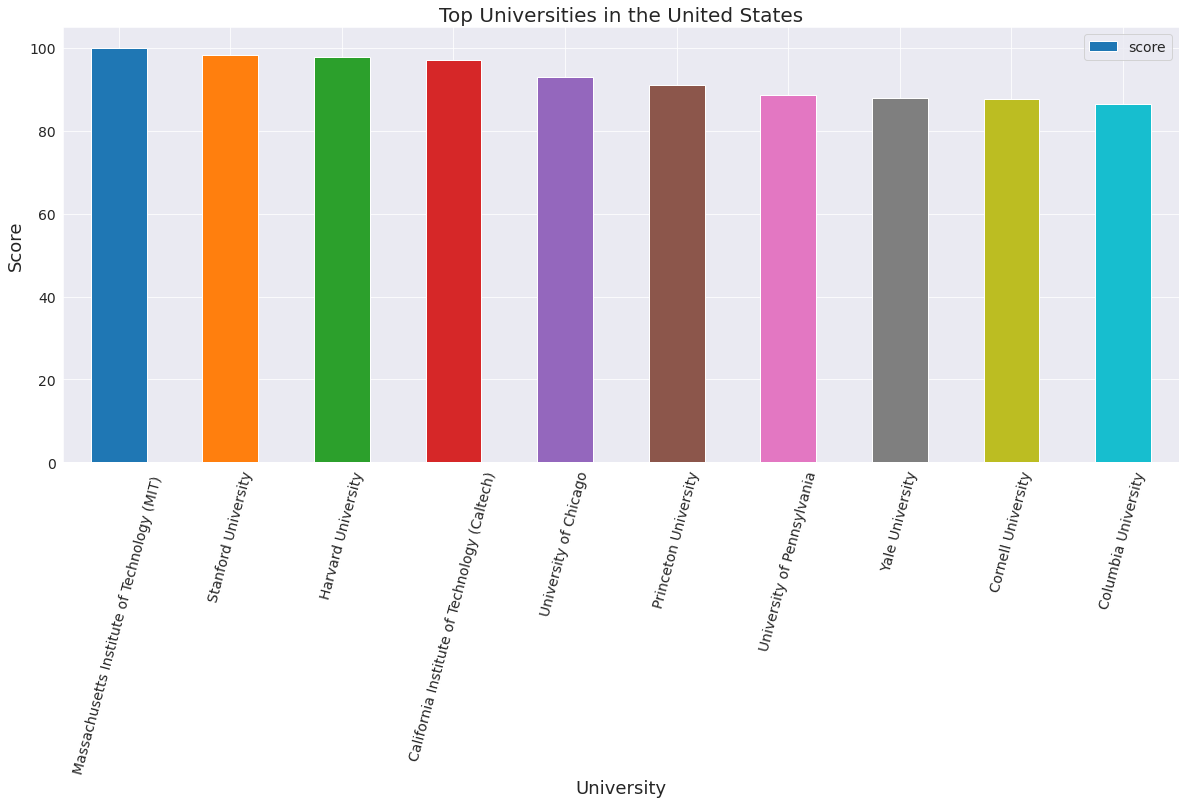

In [48]:
ax = df_us_uni.plot.bar(x = 'university', y = 'score',color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:brown', 'tab:pink', 'tab:gray','tab:olive', 'tab:cyan'], figsize=(20,8))
ax.set_title('Top Universities in the United States',fontsize = 20)
ax.set_xlabel('University', fontsize = 18)
ax.set_ylabel('Score', fontsize = 18)
plt.xticks(rotation=75)

# Top University in Hong Kong

In [37]:
df_hk_uni = df_uni[df_uni['city'] == 'Hong Kong'].head(6)

In [38]:
df_hk_uni

,year,rank_display,university,score,country,city,region
21,2021,22,The University of Hong Kong,83.7,Hong Kong SAR,Hong Kong,Asia
26,2021,27,The Hong Kong University of Science and Techno...,82.1,Hong Kong SAR,Hong Kong,Asia
42,2021,43,The Chinese University of Hong Kong (CUHK),75.8,Hong Kong SAR,Hong Kong,Asia
47,2021,48,City University of Hong Kong,74.3,Hong Kong SAR,Hong Kong,Asia
74,2021,75,The Hong Kong Polytechnic University,65.8,Hong Kong SAR,Hong Kong,Asia
263,2021,264,Hong Kong Baptist University,36.3,Hong Kong SAR,Hong Kong,Asia


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'The University of Hong Kong'),
  Text(1, 0, 'The Hong Kong University of Science and Technology'),
  Text(2, 0, 'The Chinese University of Hong Kong (CUHK)'),
  Text(3, 0, 'City University of Hong Kong'),
  Text(4, 0, 'The Hong Kong Polytechnic University'),
  Text(5, 0, 'Hong Kong Baptist University')])

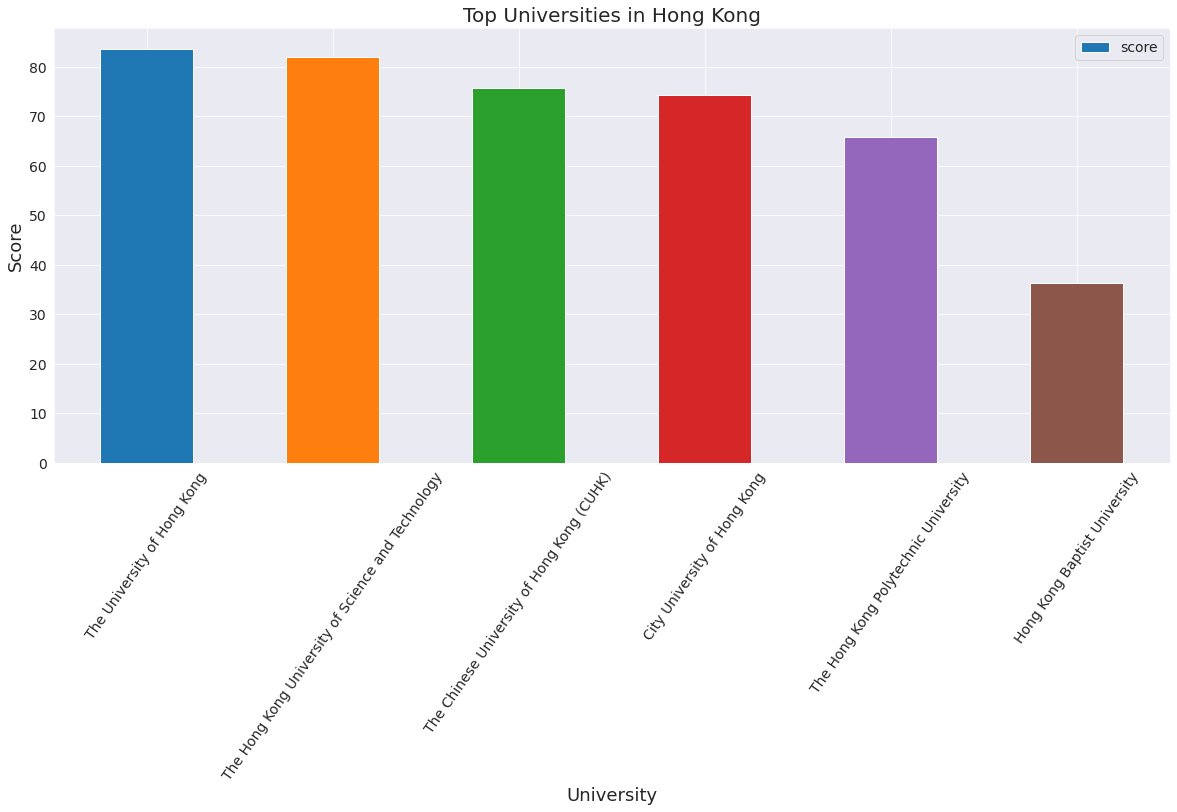

In [46]:
ax = df_hk_uni.plot.bar(x = 'university', y = 'score',color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:brown', 'tab:pink', 'tab:gray','tab:olive', 'tab:cyan'],figsize=(20,8))
ax.set_title('Top Universities in Hong Kong',fontsize = 20)
ax.set_xlabel('University', fontsize = 18)
ax.set_ylabel('Score', fontsize = 18)
plt.xticks(rotation=55)

In [40]:
df_kr_uni = df_uni[df_uni['country'] == 'South Korea'].head(10)

In [41]:
df_kr_uni

,year,rank_display,university,score,country,city,region
36,2021,37,Seoul National University,79.0,South Korea,Seoul,Asia
38,2021,39,KAIST - Korea Advanced Institute of Science & ...,78.6,South Korea,Daejeon,Asia
68,2021,69,Korea University,67.1,South Korea,Seoul,Asia
76,2021,77,Pohang University of Science And Technology (P...,64.6,South Korea,Pohang,Asia
85,2021,85,Yonsei University,62.5,South Korea,Seoul,Asia
87,2021,88,Sungkyunkwan University(SKKU),61.5,South Korea,Suwon,Asia
145,2021,146,Hanyang University,51.3,South Korea,Seoul,Asia
235,2021,236,Kyung Hee University,38.8,South Korea,NaN,Asia
294,2021,295,Gwangju Institute of Science and Technology (G...,34.5,South Korea,Gwangju,Asia
334,2021,333,Ewha Womans University,31.7,South Korea,Seoul,Asia


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Seoul National University'),
  Text(1, 0, 'KAIST - Korea Advanced Institute of Science & Technology'),
  Text(2, 0, 'Korea University'),
  Text(3, 0, 'Pohang University of Science And Technology (POSTECH)'),
  Text(4, 0, 'Yonsei University'),
  Text(5, 0, 'Sungkyunkwan University(SKKU)'),
  Text(6, 0, 'Hanyang University'),
  Text(7, 0, 'Kyung Hee University'),
  Text(8, 0, 'Gwangju Institute of Science and Technology (GIST)'),
  Text(9, 0, 'Ewha Womans University')])

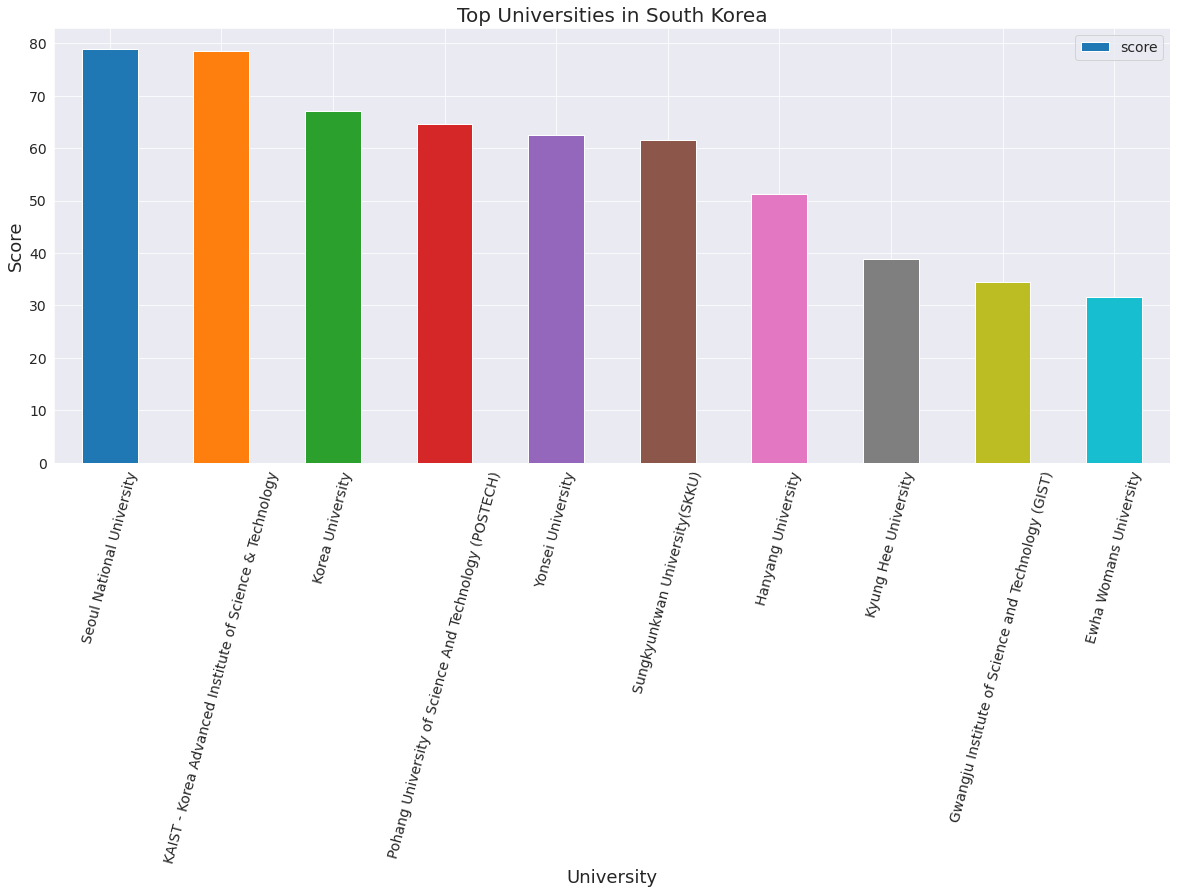

In [47]:
ax = df_kr_uni.plot.bar(x = 'university', y = 'score', color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:brown', 'tab:pink', 'tab:gray','tab:olive', 'tab:cyan'],figsize=(20,8))
ax.set_title('Top Universities in South Korea',fontsize = 20)
ax.set_xlabel('University', fontsize = 18)
ax.set_ylabel('Score', fontsize = 18)
plt.xticks(rotation=75)

In [50]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>